# Глубинное обучение в анализе графовых данных, ПМИ ВШЭ

## Семинар 4

Вполне естественно рассматривать интернет как ориентированный граф, где узлы — это страницы, а ребра — гиперссылки. Допустим, в Интернете всего 4 страницы, и возьмем, к примеру, следующий веб-граф.

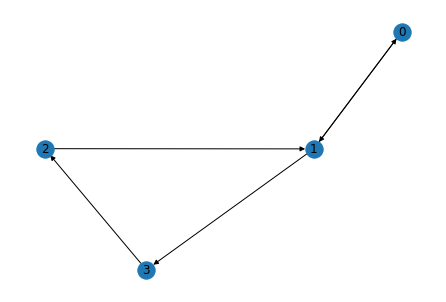

In [22]:
import networkx as nx

G = nx.DiGraph()
G.add_nodes_from([0, 1, 2, 3])
G.add_edges_from([(1, 3), (3, 2), (2, 1), (1, 0), (0, 1)])
nx.draw(G, with_labels=True)

__Матрица смежности__

In [23]:
import numpy as np

A = np.array(nx.adjacency_matrix(G).todense()).T
A

/var/folders/l0/bsbcvvsd36bfx00sxbrzsrnc0000gn/T/ipykernel_23203/4029648270.py:3: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = np.array(nx.adjacency_matrix(G).todense()).T


array([[0, 1, 0, 0],
       [1, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 1, 0, 0]])

__Матрица степеней__

In [24]:
degrees = [val//2 for (node, val) in G.degree()]
D = np.diag(degrees)
D

array([[1, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]])

Эта матрица представляет количество исходящих ребер из каждого узла. Нормируем матрицу смежности А по степени каждого узла, и получим переходную матрицу M, которая представляет вероятность перехода в каждом узле.

__Матрица перехода__
$$M = AD^{-1} $$

In [25]:
M = A @ np.linalg.inv(D)
M

array([[0. , 0.5, 0. , 0. ],
       [1. , 0. , 1. , 0. ],
       [0. , 0. , 0. , 1. ],
       [0. , 0.5, 0. , 0. ]])

In [5]:
def calculate_transition_matrix(G):
    A = np.array(nx.adjacency_matrix(G).todense()).T
    degrees = [val//2 for (node, val) in G.degree()]
    D = np.diag(degrees)
    M = A @ np.linalg.inv(D)
    return M

Каждый столбец М удовлетворяет аксиомам вероятности (для каждого столбца все элементы неотрицательны, а сумма равна 1).

### Random Surfer

Рассмотрим случайного пользователя, который исследует интернет, просто нажимая на гиперссылки на текущей странице случайным образом. Например, если случайный посетитель просматривает страницу 2, следующей страницей будет страница 0 или 3 с вероятностью 50 на 50.

Как часто этот случайный посетитель заходит на каждую страницу? Пусть v — распределение вероятностей по 4 страницам, инициализированное как равномерное распределение. Мы можем получить ответ, умножив матрицу перехода М слева итеративно. Так мы пожем посчитать цепь Маркова

$$v_{k+1} = Mv_k$$

In [27]:
initial = np.ones(len(G.nodes())) / len(G.nodes())

initial

array([0.25, 0.25, 0.25, 0.25])

In [29]:
initial = np.ones(len(G.nodes())) / len(G.nodes())
print(0, initial)
for i in range(1, 50):
    initial = M @ initial
    print(i, np.round(initial, 3))

0 [0.25 0.25 0.25 0.25]
1 [0.125 0.5   0.25  0.125]
2 [0.25  0.375 0.125 0.25 ]
3 [0.188 0.375 0.25  0.188]
4 [0.188 0.438 0.188 0.188]
5 [0.219 0.375 0.188 0.219]
6 [0.188 0.406 0.219 0.188]
7 [0.203 0.406 0.188 0.203]
8 [0.203 0.391 0.203 0.203]
9 [0.195 0.406 0.203 0.195]
10 [0.203 0.398 0.195 0.203]
11 [0.199 0.398 0.203 0.199]
12 [0.199 0.402 0.199 0.199]
13 [0.201 0.398 0.199 0.201]
14 [0.199 0.4   0.201 0.199]
15 [0.2   0.4   0.199 0.2  ]
16 [0.2   0.399 0.2   0.2  ]
17 [0.2 0.4 0.2 0.2]
18 [0.2 0.4 0.2 0.2]
19 [0.2 0.4 0.2 0.2]
20 [0.2 0.4 0.2 0.2]
21 [0.2 0.4 0.2 0.2]
22 [0.2 0.4 0.2 0.2]
23 [0.2 0.4 0.2 0.2]
24 [0.2 0.4 0.2 0.2]
25 [0.2 0.4 0.2 0.2]
26 [0.2 0.4 0.2 0.2]
27 [0.2 0.4 0.2 0.2]
28 [0.2 0.4 0.2 0.2]
29 [0.2 0.4 0.2 0.2]
30 [0.2 0.4 0.2 0.2]
31 [0.2 0.4 0.2 0.2]
32 [0.2 0.4 0.2 0.2]
33 [0.2 0.4 0.2 0.2]
34 [0.2 0.4 0.2 0.2]
35 [0.2 0.4 0.2 0.2]
36 [0.2 0.4 0.2 0.2]
37 [0.2 0.4 0.2 0.2]
38 [0.2 0.4 0.2 0.2]
39 [0.2 0.4 0.2 0.2]
40 [0.2 0.4 0.2 0.2]
41 [0.2 0.4 0.2 0

Наконец мы подошли к ответу. Случайный пользователь просматривает страницу 1 в течение 40% времени и страницы 0, 2 и 3 в течение 20% времени. Эта конечная вероятность называется PageRank (некоторые технические детали приведены ниже) и служит мерой важности для веб-страниц.

Обратите внимание, что приведенное выше итеративное умножение сходится к постоянному вектору PageRank $v$. Это эквивалентно вычислению собственного вектора, соответствующего собственному значению 1, степенным методом  (a.k.a. **power iteration**).

Для понимания что происходит также посчитаем pagerank *вручную*

In [30]:
def initialize_node_points(G):
    initial = [1 / G.number_of_nodes() for _ in range(G.number_of_nodes())]
    return G, initial


iteration_counter = 0
def update_node_points(G, previous_node_points):
    global iteration_counter
    iteration_counter += 1
    updated_node_points = [0 for _ in range(G.number_of_nodes())]
    for node in G.nodes():
        node_references = G.out_edges(node)
        if len(node_references) == 0:
            updated_node_points[node] += previous_node_points[node]
        else:
            share = previous_node_points[node] / len(node_references)
            for each_reference in node_references:
                updated_node_points[each_reference[1]] += share
    return updated_node_points, iteration_counter


def keep_updating_until_convergence(G, initial_node_points):
    convergence_value = 0.00001
    previous_node_points = initial_node_points
    while True:
        updated_node_points, iteration_counter = update_node_points(G, previous_node_points)
        for index in range(G.number_of_nodes()):
            if abs(updated_node_points[index] - previous_node_points[index]) > convergence_value:
                break
        else:
            return updated_node_points, iteration_counter
        previous_node_points = updated_node_points

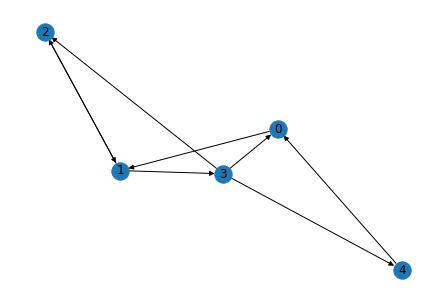

In [31]:
G = nx.DiGraph()
nodes = [i for i in range(0, 5)]
edges = [(0,1), (1,2), (1,3), (2,1), (3,0), (3,2), (3,4), (4,0)]
G.add_nodes_from(nodes)
G.add_edges_from(edges)
nx.draw(G, with_labels=True)

In [32]:
G, initial_node_points = initialize_node_points(G)
pageranks, iteration_counter = keep_updating_until_convergence(G, initial_node_points)
pageranks_array = np.array(pageranks)


print('Iteration counter:', iteration_counter)
print('Pageranks:', pageranks_array)

Iteration counter: 21
Pageranks: [0.1250008  0.3749975  0.25000085 0.1875021  0.06249875]


## Проблемы подхода

### Тупиковые узлы

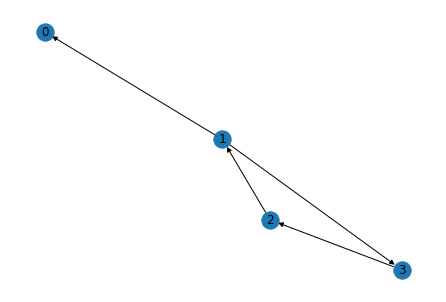

In [33]:
G = nx.DiGraph()
G.add_nodes_from([0, 1, 2, 3])
G.add_edges_from([(1, 3), (3, 2), (2, 1), (1, 0)])
nx.draw(G, with_labels=True)

Тупиковые узлы поглощают случайного посетителя и устанавливают PageRank других страниц равным 0. Чтобы избежать этого результата, мы добавляем виртуальные ребра, направленные от этих узлов ко всем остальным узлам. С этой настройкой random surfer, застрявший в узлах приемника, может случайным образом переходить на другие страницы. Матрица перехода для приведенного выше графа:

$$M = \begin{pmatrix}
0 & 1/2 & 0 & 0\\
1/3 & 0 & 1 & 0\\
1/3 & 0 & 0 & 1\\
1/3 & 1/2 & 0 & 0\\
\end{pmatrix}$$

### Изолированные компоненты графа

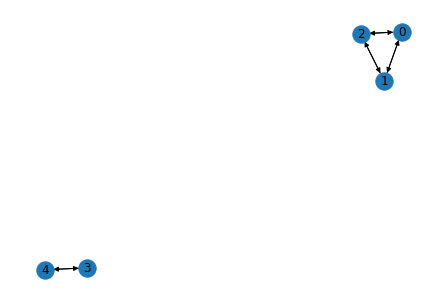

In [34]:
G = nx.DiGraph()
G.add_nodes_from([0, 1, 2, 3, 4])
G.add_edges_from([(0, 1), (1, 0), (0, 2), (2, 0), (1, 2), (2, 1), (4, 3), (3, 4)])
nx.draw(G, with_labels=True)

В таких случаях матрица перехода является блочно-диагональной и имеет несколько линейно независимых собственных векторов, соответствующих собственному значению 1.

In [35]:
calculate_transition_matrix(G)

/var/folders/l0/bsbcvvsd36bfx00sxbrzsrnc0000gn/T/ipykernel_23203/2208934866.py:2: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = np.array(nx.adjacency_matrix(G).todense()).T


array([[0. , 0.5, 0.5, 0. , 0. ],
       [0.5, 0. , 0.5, 0. , 0. ],
       [0.5, 0.5, 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 1. ],
       [0. , 0. , 0. , 1. , 0. ]])

Чтобы решить эту проблему, создатели PageRank представили damping factor *d*

$$M = (1-d)M + \frac{d}{n}J_n$$
 
где n - количество узлов и $J_n$ - является матрицей единиц. Эта переформулированная матрица перехода также называется Google матрицей. Матрица Google делает все связанные узлы и векторы PageRank уникальными для веб-графов. Это также решает циклический серфинг, который делает нереальным power method. Интуитивно, damping factor позволяет скучающему случайному посетителю перейти на другую случайную страницу с вероятностью d.

### Вопросы

Выше указали, что итеративный расчет PageRank эквивалентен вычислению собственного вектора, соответствующего собственному значению 1. Но могут возникнуть некоторые вопросы. Всегда ли Google матрица перехода имеет собственное значение 1 кратности один? Всегда ли итеративный расчет сходится к уникальному вектору? Насколько быстро происходит сходимость?

#### Теорема Фробениуса — Перрона

Из [теоремы](https://ru.wikipedia.org/wiki/%D0%A2%D0%B5%D0%BE%D1%80%D0%B5%D0%BC%D0%B0_%D0%A4%D1%80%D0%BE%D0%B1%D0%B5%D0%BD%D0%B8%D1%83%D1%81%D0%B0_%E2%80%94_%D0%9F%D0%B5%D1%80%D1%80%D0%BE%D0%BD%D0%B0), т к матрица M положительна и поколоночно стахостична, следует:

1. M имеет собственное значение 1 единичной кратности.
2. 1 — наибольшее собственное значение: все остальные собственные значения имеют абсолютные значения меньше 1.
3. Для собственного значения 1 существует единственный собственный вектор, сумма элементов которого равна 1.

[Здесь](https://sites.math.northwestern.edu/~clark/354/2002/perron.pdf) можете найти доказательство

Эти утверждения указывают на то, что существует уникальный собственный вектор для собственного значения 1, сумма элементов которого равна 1. Говоря проще, нам нужно только вычислить собственный вектор для собственного значения 1, чтобы получить PageRank.

### Power method

Power method представляет собой численный алгоритм вычисления собственного значения с наибольшим модулем и его собственного вектора. Мы знаем, что наибольшее собственное значение матрицы Google M равно 1, поэтому power method прост: просто итеративно умножаем M на любой начальной вектор.

Обозначая наибольшее и второе по величине (по модулю) собственное значение как $\lambda_1, \lambda_2$, соответственно, коэффициент сходимости равен

$$|{\frac{\lambda_1}{\lambda_2}}| = |\lambda_2|$$

### Реализация

Это все, что касается теоретической части PageRank. PageRank можно рассчитать двумя способами: методом собственного разложения и с помощью power method.

In [13]:
import networkx as nx
import numpy as np


def get_google_matrix(G, d=0.15):
    n = G.number_of_nodes()
    A = nx.to_numpy_array(G).T
    # for sink nodes
    is_sink = np.sum(A, axis=0)==0
    B = (np.ones_like(A) - np.identity(n)) / (n-1)
    A[:, is_sink] += B[:, is_sink]
    
    D_inv = np.diag(1/np.sum(A, axis=0))
    M = np.dot(A, D_inv) 
    
    # for disconnected components
    M = (1-d)*M + d*np.ones((n,n))/n
    return M

def l1(x):
    return np.sum(np.abs(x))

Первое решение — собственное разложение матрицы Google. L1-нормированный собственный вектор, соответствующий наибольшему собственному значению (=1) — вектор PageRank.

In [38]:
def pagerank_edc(G, d=0.15):
    M = get_google_matrix(G, d=d)
    eigenvalues, eigenvectors = np.linalg.eig(M)
    idx = eigenvalues.argsort()[-1]
    largest = np.array(eigenvectors[:,idx]).flatten().real
    return largest / l1(largest)

In [39]:
import networkx as nx

G = nx.DiGraph()
G.add_nodes_from([0, 1, 2, 3])
G.add_edges_from([(1, 3), (3, 2), (2, 1), (1, 0), (0, 1)])
pagerank_edc(G)

array([0.20195025, 0.38694178, 0.20915772, 0.20195025])

Какая сложность у алгоритма? 
Временная сложность $O(n^3)$, поскольку собственное разложение является сложной оперцией. Это решение с более чем одним триллионом вершин (веб-страниц) является слишком дорогим.

### Power Method

Метод инициализирует $v_0$ как равномерное распределение и итеративно умножает матрицу Google, пока она не сойдется или не достигнет максимального количества итераций.

In [37]:
def pagerank_power(G, d=0.15, max_iter=100, eps=1e-9):
    M = get_google_matrix(G, d=d)
    n = G.number_of_nodes()
    V = np.ones(n)/n
    for _ in range(max_iter):
        V_last = V
        V = np.dot(M, V)
        if  l1(V - V_last) / n < eps:
            return V
    return V

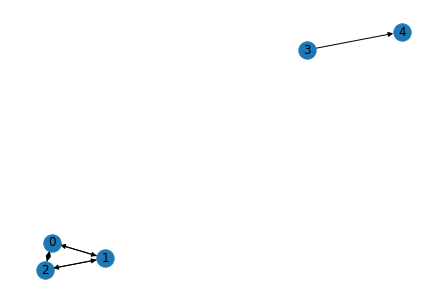

In [48]:
G = nx.DiGraph()
G.add_nodes_from([0, 1, 2, 3, 4])
G.add_edges_from([(0, 1), (1, 0), (0, 2), (2, 0), (1, 2), (2, 1), (3, 4)])
nx.draw(G, with_labels=True)

In [49]:
pagerank_power(G)

array([0.29595728, 0.29595728, 0.29595728, 0.04439359, 0.06773455])

Что касается сложности, в этом алгоритме самым сложным является умножение матрицы на вектор, поскольку количество итераций ограничено max_iter. Следовательно, временная сложность $O(n^2)$. Далее сложность сводится к $O(n)$, с использованием разреженного матричного умножения. Напоминаем, что матрица Google — это взвешенная сумма матрицы перехода (разреженной!) и матрицы единиц (просто оператора суммы).

In [40]:
def gen_webgraph(n, m):
    G = nx.DiGraph(nx.barabasi_albert_graph(n,m))
    rands = np.random.choice(n, n//2, replace=False)
    G.remove_edges_from(np.array(G.edges)[rands])
    return G

In [42]:
import time


number_of_nodes = range(100, 1600, 200)
times_edc = []
times_power = []
for n in number_of_nodes:
    G = gen_webgraph(n, 50)
    
    st = time.time()
    pagerank_edc(G)
    times_edc.append(time.time() - st)
    
    st = time.time()
    pagerank_power(G)
    times_power.append(time.time() - st)

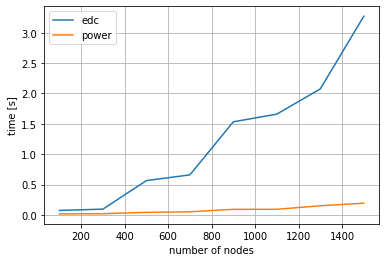

In [43]:
import matplotlib.pylab as plt


plt.grid()
plt.plot(list(number_of_nodes), times_edc, label='edc')
plt.plot(list(number_of_nodes), times_power, label='power')
plt.xlabel("number of nodes")
plt.ylabel("time [s]")
plt.legend()
plt.show()

Как можем видеть, power method быстрее, чем собственное разложение, особенно когда у нас много узлов.

Есть некоторые расширения, такие как Personalized PageRank, который использует распределения, предвзятые для каждого пользователя, вместо равномерного распределения $J_n$ для расчета Google матрицы.

In [20]:
def pagerank_with_personalization(
    G,
    alpha=0.85,
    personalization=None,
    max_iter=100,
    tol=1.0e-6,
    nstart=None,
    weight="weight",
    dangling=None
):
    if len(G) == 0:
        return {}

    D = G.to_directed()

    # Create a copy in (right) stochastic form
    W = nx.stochastic_graph(D, weight=weight)
    N = W.number_of_nodes()

    # Choose fixed starting vector if not given
    if nstart is None:
        x = dict.fromkeys(W, 1.0 / N)
    else:
        # Normalized nstart vector
        s = sum(nstart.values())
        x = {k: v / s for k, v in nstart.items()}

    if personalization is None:
        # Assign uniform personalization vector if not given
        p = dict.fromkeys(W, 1.0 / N)
    else:
        s = sum(personalization.values())
        p = {k: v / s for k, v in personalization.items()}

    if dangling is None:
        # Use personalization vector if dangling vector not specified
        dangling_weights = p
    else:
        s = sum(dangling.values())
        dangling_weights = {k: v / s for k, v in dangling.items()}
    dangling_nodes = [n for n in W if W.out_degree(n, weight=weight) == 0.0]

    # power iteration: make up to max_iter iterations
    for _ in range(max_iter):
        xlast = x
        x = dict.fromkeys(xlast.keys(), 0)
        danglesum = alpha * sum(xlast[n] for n in dangling_nodes)
        for n in x:
            # this matrix multiply looks odd because it is
            # doing a left multiply x^T=xlast^T*W
            for _, nbr, wt in W.edges(n, data=weight):
                x[nbr] += alpha * xlast[n] * wt
            x[n] += danglesum * dangling_weights.get(n, 0) + (1.0 - alpha) * p.get(n, 0)
        # check convergence, l1 norm
        err = sum(abs(x[n] - xlast[n]) for n in x)
        if err < N * tol:
            return x

{0: 0.1724140124772394,
 1: 0.3275859875227606,
 2: 0.3275859875227606,
 3: 0.1724140124772394}

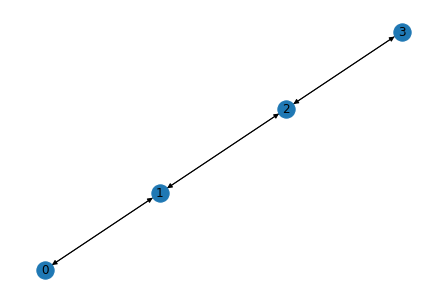

In [45]:
G = nx.DiGraph(nx.path_graph(4))

nx.draw(G, with_labels=True)
nx.pagerank(G, alpha=0.9)